In [133]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

In [134]:
df = pd.DataFrame()
df["reviews",] = reviews
df

,"(reviews,)"
0,✅ Trip Verified | London Heathrow to Male In...
1,Not Verified | Very good flight following an ...
2,Not Verified | An hour's delay due to late ar...
3,✅ Trip Verified | I booked through BA becaus...
4,✅ Trip Verified | British airways lost bags ...
...,...
995,✅ Trip Verified | London to Shanghai. The Con...
996,Not Verified | I have often flown British Air...
997,Not Verified | Good morning. I would like to ...
998,✅ Trip Verified | My flight was cancelled 3 da...


In [135]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Base URL for the British Airways reviews
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10  # Number of pages to scrape
page_size = 100  # Number of reviews per page

# Initialize an empty list to store review data
reviews_data = []

# Loop through the pages
for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    # Construct the URL for the current page
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    try:
        # Send a request to fetch the HTML content of the page
        response = requests.get(url)
        response.raise_for_status()  # Will raise an HTTPError if the status code is 4xx/5xx

        # Parse the HTML content with BeautifulSoup
        content = response.content
        parsed_content = BeautifulSoup(content, 'html.parser')

        # Find all review elements
        for review in parsed_content.find_all("article", {"itemprop": "review"}):
            # Extract the review title, author, date, body content, and rating
            title = review.find("h2", {"class": "text_header"}).get_text(strip=True)
            author = review.find("span", {"itemprop": "name"}).get_text(strip=True)
            date = review.find("time", {"itemprop": "datePublished"}).get_text(strip=True)
            review_text = review.find("div", {"class": "text_content"}).get_text(strip=True)

            # Extract rating value (e.g., "2/10")
            rating = review.find("span", {"itemprop": "ratingValue"})
            best_rating = review.find("span", {"itemprop": "bestRating"})
            rating_value = f"{rating.get_text()}/{best_rating.get_text()}" if rating and best_rating else "N/A"

            # Append review data to the list
            reviews_data.append({
                "Review Title": title,
                "Author": author,
                "Date": date,
                "Review Body": review_text,
                "Rating": rating_value
            })

        print(f"   ---> {len(reviews_data)} total reviews")

    except requests.exceptions.RequestException as e:
        print(f"Error on page {i}: {e}")
        continue

# After scraping, convert the reviews list into a pandas DataFrame
reviews_df = pd.DataFrame(reviews_data)

# Display the DataFrame to verify the data
print(reviews_df.head())

# Optionally, save the DataFrame to a CSV file
reviews_df.to_csv("british_airways_reviews.csv", index=False, encoding="utf-8")
print("Reviews saved to 'british_airways_reviews.csv'")


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
                                   Review Title            Author  \
0               "a really enjoyable experience"          Paul Lee   
1                            "Very good flight"        Guy Senior   
2        "relatively comfortable elderly plane"     Simon Channon   
3  "70 days chasing BA’s complaints department"           R Layne   
4                  "BA refused to reimburse me"  Michael Chastain   

                Date                                        Review Body Rating  
0  1st February 2025  ✅Trip Verified|   London Heathrow to Male In n...   9/10  
1

In [136]:
reviews_df.head()

,Review Title,Author,Date,Review Body,Rating
0,"""a really enjoyable experience""",Paul Lee,1st February 2025,✅Trip Verified| London Heathrow to Male In n...,9/10
1,"""Very good flight""",Guy Senior,20th January 2025,Not Verified| Very good flight following an e...,9/10
2,"""relatively comfortable elderly plane""",Simon Channon,19th January 2025,Not Verified| An hour's delay due to late arr...,7/10
3,"""70 days chasing BA’s complaints department""",R Layne,15th January 2025,✅Trip Verified| I booked through BA because ...,1/10
4,"""BA refused to reimburse me""",Michael Chastain,9th January 2025,✅Trip Verified| British airways lost bags in...,1/10


In [137]:
# Analyse data
# Once you have your dataset, you need to prepare it. The data will be very messy and contain purely text. You will need to perform data cleaning in order to prepare the data for analysis. When the data is clean, you should perform your own analysis to uncover some insights. As a starting point, you could look at topic modelling, sentiment analysis or wordclouds to provide some insight into the content of the reviews. It is recommended to complete this task using Python, however, you can use any tool that you wish. You can use some of the documentation websites provided in the Resources section below to analyse the data.

# Please ensure that you have created a folder called "data" and mapped your file path.

# Present insights
# Your manager would like you to summarise your findings within a single PowerPoint slide, so that they can present the results at the next board meeting. You should create visualisations and metrics to include within this slide, as well as clear and concise explanations in order to quickly provide the key points from your analysis. Use the “PowerPoint Template” provided to complete the slide.

# Once you’ve completed your PowerPoint, please submit your document below.

In [138]:
# first column analysis
reviews_df.columns

Index(['Review Title', 'Author', 'Date', 'Review Body', 'Rating'], dtype='object')

In [139]:
# Assuming your DataFrame is stored in 'df'
column_names = df.columns.tolist()

# Print the column names
print(column_names)


[('reviews',)]


In [140]:
df = pd.read_csv('british_airways_reviews.csv')

In [141]:
df

,Review Title,Author,Date,Review Body,Rating
0,"""a really enjoyable experience""",Paul Lee,1st February 2025,✅Trip Verified| London Heathrow to Male In n...,9/10
1,"""Very good flight""",Guy Senior,20th January 2025,Not Verified| Very good flight following an e...,9/10
2,"""relatively comfortable elderly plane""",Simon Channon,19th January 2025,Not Verified| An hour's delay due to late arr...,7/10
3,"""70 days chasing BA’s complaints department""",R Layne,15th January 2025,✅Trip Verified| I booked through BA because ...,1/10
4,"""BA refused to reimburse me""",Michael Chastain,9th January 2025,✅Trip Verified| British airways lost bags in...,1/10
...,...,...,...,...,...
995,"""Overall, the journey was great""",Shixin Chu,25th August 2019,✅Trip Verified| London to Shanghai. The Conco...,9/10
996,"""you will not be able to get any help""",M Simpson,24th August 2019,Not Verified| I have often flown British Airw...,2/10
997,"""They were beyond amazing!""",Natalie James-Deegan,24th August 2019,Not Verified| Good morning. I would like to w...,10/10
998,"""flight was cancelled 3 days in a row""",O Morton,23rd August 2019,✅Trip Verified| My flight was cancelled 3 days...,1/10


In [142]:

# Assuming your DataFrame is stored in 'df'
column_names = df.columns.tolist()

# Print the column names
print(column_names)



['Review Title', 'Author', 'Date', 'Review Body', 'Rating']


In [143]:
df['Review Title']

,Review Title
0,"""a really enjoyable experience"""
1,"""Very good flight"""
2,"""relatively comfortable elderly plane"""
3,"""70 days chasing BA’s complaints department"""
4,"""BA refused to reimburse me"""
...,...
995,"""Overall, the journey was great"""
996,"""you will not be able to get any help"""
997,"""They were beyond amazing!"""
998,"""flight was cancelled 3 days in a row"""


In [144]:
def clean_review_title(title):
    # Convert to lowercase
    title = title.lower()

    # Remove special characters and numbers (you can adjust this as needed)
    title = re.sub(r'[^a-z\s]', '', title)

    # Remove extra spaces
    title = re.sub(r'\s+', ' ', title).strip()

    return title

# Apply the cleaning function to the 'Review Title' column
df['Cleaned Review Title'] = df['Review Title'].apply(clean_review_title)

# Show the cleaned DataFrame
print(df[['Review Title', 'Cleaned Review Title']])

                                     Review Title  \
0                 "a really enjoyable experience"   
1                              "Very good flight"   
2          "relatively comfortable elderly plane"   
3    "70 days chasing BA’s complaints department"   
4                    "BA refused to reimburse me"   
..                                            ...   
995              "Overall, the journey was great"   
996        "you will not be able to get any help"   
997                   "They were beyond amazing!"   
998        "flight was cancelled 3 days in a row"   
999            "service was totally unacceptable"   

                       Cleaned Review Title  
0             a really enjoyable experience  
1                          very good flight  
2      relatively comfortable elderly plane  
3    days chasing bas complaints department  
4                ba refused to reimburse me  
..                                      ...  
995           overall the journey was gre

In [145]:
df.drop('Review Title', axis=1, inplace=True)

In [146]:
df.drop('Author', axis=1, inplace=True)

In [147]:
df

,Date,Review Body,Rating,Cleaned Review Title
0,1st February 2025,✅Trip Verified| London Heathrow to Male In n...,9/10,a really enjoyable experience
1,20th January 2025,Not Verified| Very good flight following an e...,9/10,very good flight
2,19th January 2025,Not Verified| An hour's delay due to late arr...,7/10,relatively comfortable elderly plane
3,15th January 2025,✅Trip Verified| I booked through BA because ...,1/10,days chasing bas complaints department
4,9th January 2025,✅Trip Verified| British airways lost bags in...,1/10,ba refused to reimburse me
...,...,...,...,...
995,25th August 2019,✅Trip Verified| London to Shanghai. The Conco...,9/10,overall the journey was great
996,24th August 2019,Not Verified| I have often flown British Airw...,2/10,you will not be able to get any help
997,24th August 2019,Not Verified| Good morning. I would like to w...,10/10,they were beyond amazing
998,23rd August 2019,✅Trip Verified| My flight was cancelled 3 days...,1/10,flight was cancelled days in a row


In [148]:
df['Review Body']

,Review Body
0,✅Trip Verified| London Heathrow to Male In n...
1,Not Verified| Very good flight following an e...
2,Not Verified| An hour's delay due to late arr...
3,✅Trip Verified| I booked through BA because ...
4,✅Trip Verified| British airways lost bags in...
...,...
995,✅Trip Verified| London to Shanghai. The Conco...
996,Not Verified| I have often flown British Airw...
997,Not Verified| Good morning. I would like to w...
998,✅Trip Verified| My flight was cancelled 3 days...


In [149]:
import pandas as pd
import re

def split_review_body(text):
    # Extract review content (text after the '|')
    review_content = text.split('|', 1)[1].strip() if '|' in text else text.strip()

    # Extract trip or verification info (text before the '|')
    trip_info = text.split('|', 1)[0].strip()

    return review_content, trip_info

In [150]:
df = pd.DataFrame(df)

# Apply the function to create two new columns: 'Review Content' and 'Trip Information'
df[['Review Content', 'Trip Information']] = df['Review Body'].apply(lambda x: pd.Series(split_review_body(x)))

# Show the cleaned DataFrame
print(df[['Review Body', 'Review Content', 'Trip Information']])

                                           Review Body  \
0    ✅Trip Verified|   London Heathrow to Male In n...   
1    Not Verified|  Very good flight following an e...   
2    Not Verified|  An hour's delay due to late arr...   
3    ✅Trip Verified|   I booked through BA because ...   
4    ✅Trip Verified|   British airways lost bags in...   
..                                                 ...   
995  ✅Trip Verified|  London to Shanghai. The Conco...   
996  Not Verified|  I have often flown British Airw...   
997  Not Verified|  Good morning. I would like to w...   
998  ✅Trip Verified| My flight was cancelled 3 days...   
999  ✅Trip Verified|  Hong Kong to Copenhagen via L...   

                                        Review Content Trip Information  
0    London Heathrow to Male In new business class....   ✅Trip Verified  
1    Very good flight following an equally good fli...     Not Verified  
2    An hour's delay due to late arrival of the inc...     Not Verified  
3    I 

In [151]:
df

,Date,Review Body,Rating,Cleaned Review Title,Review Content,Trip Information
0,1st February 2025,✅Trip Verified| London Heathrow to Male In n...,9/10,a really enjoyable experience,London Heathrow to Male In new business class....,✅Trip Verified
1,20th January 2025,Not Verified| Very good flight following an e...,9/10,very good flight,Very good flight following an equally good fli...,Not Verified
2,19th January 2025,Not Verified| An hour's delay due to late arr...,7/10,relatively comfortable elderly plane,An hour's delay due to late arrival of the inc...,Not Verified
3,15th January 2025,✅Trip Verified| I booked through BA because ...,1/10,days chasing bas complaints department,I booked through BA because Loganair don’t hav...,✅Trip Verified
4,9th January 2025,✅Trip Verified| British airways lost bags in...,1/10,ba refused to reimburse me,British airways lost bags in LHR then found th...,✅Trip Verified
...,...,...,...,...,...,...
995,25th August 2019,✅Trip Verified| London to Shanghai. The Conco...,9/10,overall the journey was great,London to Shanghai. The Concorde room in Heath...,✅Trip Verified
996,24th August 2019,Not Verified| I have often flown British Airw...,2/10,you will not be able to get any help,I have often flown British Airways and have co...,Not Verified
997,24th August 2019,Not Verified| Good morning. I would like to w...,10/10,they were beyond amazing,Good morning. I would like to write a review f...,Not Verified
998,23rd August 2019,✅Trip Verified| My flight was cancelled 3 days...,1/10,flight was cancelled days in a row,My flight was cancelled 3 days in a row. Was f...,✅Trip Verified


In [152]:
df.drop('Review Body', axis=1, inplace=True)

In [153]:
df


,Date,Rating,Cleaned Review Title,Review Content,Trip Information
0,1st February 2025,9/10,a really enjoyable experience,London Heathrow to Male In new business class....,✅Trip Verified
1,20th January 2025,9/10,very good flight,Very good flight following an equally good fli...,Not Verified
2,19th January 2025,7/10,relatively comfortable elderly plane,An hour's delay due to late arrival of the inc...,Not Verified
3,15th January 2025,1/10,days chasing bas complaints department,I booked through BA because Loganair don’t hav...,✅Trip Verified
4,9th January 2025,1/10,ba refused to reimburse me,British airways lost bags in LHR then found th...,✅Trip Verified
...,...,...,...,...,...
995,25th August 2019,9/10,overall the journey was great,London to Shanghai. The Concorde room in Heath...,✅Trip Verified
996,24th August 2019,2/10,you will not be able to get any help,I have often flown British Airways and have co...,Not Verified
997,24th August 2019,10/10,they were beyond amazing,Good morning. I would like to write a review f...,Not Verified
998,23rd August 2019,1/10,flight was cancelled days in a row,My flight was cancelled 3 days in a row. Was f...,✅Trip Verified


In [154]:
df['Rating']

,Rating
0,9/10
1,9/10
2,7/10
3,1/10
4,1/10
...,...
995,9/10
996,2/10
997,10/10
998,1/10


In [155]:
# Function to extract the value before the '/'
df['Rating'] = df['Rating'].apply(lambda x: re.sub(r'^.*?(\d+)/.*$', r'\1', x))

In [156]:
df

,Date,Rating,Cleaned Review Title,Review Content,Trip Information
0,1st February 2025,9,a really enjoyable experience,London Heathrow to Male In new business class....,✅Trip Verified
1,20th January 2025,9,very good flight,Very good flight following an equally good fli...,Not Verified
2,19th January 2025,7,relatively comfortable elderly plane,An hour's delay due to late arrival of the inc...,Not Verified
3,15th January 2025,1,days chasing bas complaints department,I booked through BA because Loganair don’t hav...,✅Trip Verified
4,9th January 2025,1,ba refused to reimburse me,British airways lost bags in LHR then found th...,✅Trip Verified
...,...,...,...,...,...
995,25th August 2019,9,overall the journey was great,London to Shanghai. The Concorde room in Heath...,✅Trip Verified
996,24th August 2019,2,you will not be able to get any help,I have often flown British Airways and have co...,Not Verified
997,24th August 2019,10,they were beyond amazing,Good morning. I would like to write a review f...,Not Verified
998,23rd August 2019,1,flight was cancelled days in a row,My flight was cancelled 3 days in a row. Was f...,✅Trip Verified


In [157]:
df.describe()

,Date,Rating,Cleaned Review Title,Review Content,Trip Information
count,1000,1000,1000,1000,1000
unique,722,10,973,1000,3
top,8th December 2019,1,appalling customer service,London Heathrow to Male In new business class....,✅Trip Verified
freq,7,387,3,1,739


In [158]:
df['Trip Information'].unique()

array(['✅Trip Verified', 'Not Verified', 'cNot Verified'], dtype=object)

In [159]:
# Remove the 'c' from 'cNot Verified' in the 'Trip Information' column
df['Trip Information'] = df['Trip Information'].str.replace(r'^c', '', regex=True)

# Show the cleaned DataFrame
print(df[['Trip Information']].head())


  Trip Information
0   ✅Trip Verified
1     Not Verified
2     Not Verified
3   ✅Trip Verified
4   ✅Trip Verified


In [160]:
# Keep only 'Verified' or 'Not Verified' in the 'Trip Information' column
df['Trip Information'] = df['Trip Information'].str.extract(r'(Verified|Not Verified)')
# Show the cleaned DataFram
print(df[['Trip Information']].head())


  Trip Information
0         Verified
1     Not Verified
2     Not Verified
3         Verified
4         Verified


In [161]:
df['Review Content']

,Review Content
0,London Heathrow to Male In new business class....
1,Very good flight following an equally good fli...
2,An hour's delay due to late arrival of the inc...
3,I booked through BA because Loganair don’t hav...
4,British airways lost bags in LHR then found th...
...,...
995,London to Shanghai. The Concorde room in Heath...
996,I have often flown British Airways and have co...
997,Good morning. I would like to write a review f...
998,My flight was cancelled 3 days in a row. Was f...


In [162]:
import nltk

# Download the punkt data (for tokenization) and stopwords data
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [163]:
df_copy = df[['Review Content', 'Trip Information','Cleaned Review Title']]

In [164]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [165]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

df = df_copy

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Clean text function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove non-alphabetic characters (numbers, punctuation)
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize and remove stopwords, lemmatize the words
    words = text.split()
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    # Join cleaned words back into a string
    return ' '.join(cleaned_words)

# Apply the cleaning function to both columns
df['Cleaned Review Content'] = df['Review Content'].apply(clean_text)
df['Cleaned Review Title'] = df['Cleaned Review Title'].apply(clean_text)
# View cleaned data
print(df[['Review Content', 'Trip Information', 'Cleaned Review Title']].head())


                                      Review Content Trip Information  \
0  London Heathrow to Male In new business class....         Verified   
1  Very good flight following an equally good fli...     Not Verified   
2  An hour's delay due to late arrival of the inc...     Not Verified   
3  I booked through BA because Loganair don’t hav...         Verified   
4  British airways lost bags in LHR then found th...         Verified   

                   Cleaned Review Title  
0           really enjoyable experience  
1                           good flight  
2  relatively comfortable elderly plane  
3   day chasing ba complaint department  
4                  ba refused reimburse  


<ipython-input-165-fcfbd6ea9de7>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cleaned Review Content'] = df['Review Content'].apply(clean_text)
<ipython-input-165-fcfbd6ea9de7>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cleaned Review Title'] = df['Cleaned Review Title'].apply(clean_text)


In [166]:
df

,Review Content,Trip Information,Cleaned Review Title,Cleaned Review Content
0,London Heathrow to Male In new business class....,Verified,really enjoyable experience,london heathrow male new business class ba con...
1,Very good flight following an equally good fli...,Not Verified,good flight,good flight following equally good flight rome...
2,An hour's delay due to late arrival of the inc...,Not Verified,relatively comfortable elderly plane,hour delay due late arrival incoming aircraft ...
3,I booked through BA because Loganair don’t hav...,Verified,day chasing ba complaint department,booked ba loganair dont representative manches...
4,British airways lost bags in LHR then found th...,Verified,ba refused reimburse,british airway lost bag lhr found sent cologne...
...,...,...,...,...
995,London to Shanghai. The Concorde room in Heath...,Verified,overall journey great,london shanghai concorde room heathrow termina...
996,I have often flown British Airways and have co...,Not Verified,able get help,often flown british airway considered good air...
997,Good morning. I would like to write a review f...,Not Verified,beyond amazing,good morning would like write review british a...
998,My flight was cancelled 3 days in a row. Was f...,Verified,flight cancelled day row,flight cancelled day row flying thursday final...


In [167]:
df.drop('Review Content', axis=1, inplace=True)

<ipython-input-167-915619d97727>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Review Content', axis=1, inplace=True)


In [168]:
df


,Trip Information,Cleaned Review Title,Cleaned Review Content
0,Verified,really enjoyable experience,london heathrow male new business class ba con...
1,Not Verified,good flight,good flight following equally good flight rome...
2,Not Verified,relatively comfortable elderly plane,hour delay due late arrival incoming aircraft ...
3,Verified,day chasing ba complaint department,booked ba loganair dont representative manches...
4,Verified,ba refused reimburse,british airway lost bag lhr found sent cologne...
...,...,...,...
995,Verified,overall journey great,london shanghai concorde room heathrow termina...
996,Not Verified,able get help,often flown british airway considered good air...
997,Not Verified,beyond amazing,good morning would like write review british a...
998,Verified,flight cancelled day row,flight cancelled day row flying thursday final...


In [169]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [170]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment
def get_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] > 0.05:
        return 'Positive'
    elif score['compound'] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
df['Review Sentiment'] = df['Cleaned Review Content'].apply(get_sentiment)
df['Title Sentiment'] = df['Cleaned Review Title'].apply(get_sentiment)

# View sentiment results
print(df[['Cleaned Review Content', 'Review Sentiment', 'Cleaned Review Title', 'Title Sentiment']].head())


                              Cleaned Review Content Review Sentiment  \
0  london heathrow male new business class ba con...         Positive   
1  good flight following equally good flight rome...         Positive   
2  hour delay due late arrival incoming aircraft ...         Positive   
3  booked ba loganair dont representative manches...         Positive   
4  british airway lost bag lhr found sent cologne...         Negative   

                   Cleaned Review Title Title Sentiment  
0           really enjoyable experience        Positive  
1                           good flight        Positive  
2  relatively comfortable elderly plane        Positive  
3   day chasing ba complaint department        Negative  
4                  ba refused reimburse        Negative  


<ipython-input-170-df40af5bd2eb>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Sentiment'] = df['Cleaned Review Content'].apply(get_sentiment)


In [171]:
df

,Trip Information,Cleaned Review Title,Cleaned Review Content,Review Sentiment,Title Sentiment
0,Verified,really enjoyable experience,london heathrow male new business class ba con...,Positive,Positive
1,Not Verified,good flight,good flight following equally good flight rome...,Positive,Positive
2,Not Verified,relatively comfortable elderly plane,hour delay due late arrival incoming aircraft ...,Positive,Positive
3,Verified,day chasing ba complaint department,booked ba loganair dont representative manches...,Positive,Negative
4,Verified,ba refused reimburse,british airway lost bag lhr found sent cologne...,Negative,Negative
...,...,...,...,...,...
995,Verified,overall journey great,london shanghai concorde room heathrow termina...,Positive,Positive
996,Not Verified,able get help,often flown british airway considered good air...,Negative,Positive
997,Not Verified,beyond amazing,good morning would like write review british a...,Positive,Positive
998,Verified,flight cancelled day row,flight cancelled day row flying thursday final...,Negative,Negative


In [172]:
# Count of 'Verified' vs 'Not Verified'
verified_counts = df['Trip Information'].value_counts()
print(verified_counts)

# Sentiment analysis comparison based on Trip Information
verified_sentiment = df.groupby('Trip Information')['Review Sentiment'].value_counts().unstack()
print(verified_sentiment)


Trip Information
Verified        739
Not Verified    261
Name: count, dtype: int64
Review Sentiment  Negative  Neutral  Positive
Trip Information                             
Not Verified           121        3       137
Verified               327       17       395


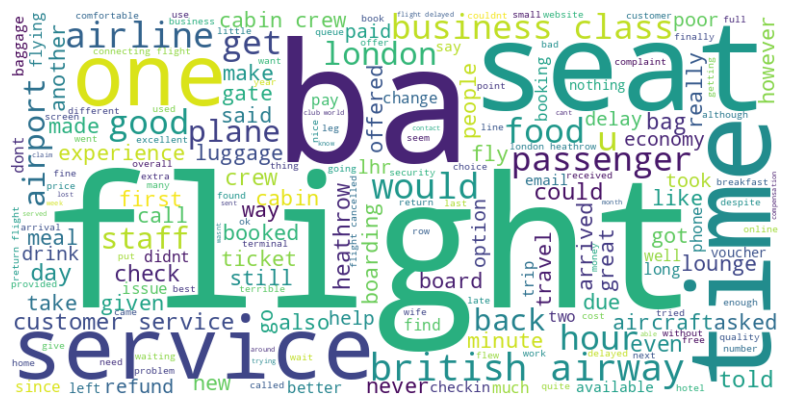

<Figure size 640x480 with 0 Axes>

In [179]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for the 'Review Content' column
wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=800, height=400).generate(' '.join(df['Cleaned Review Content']))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
# Save the figure as an image file
plt.savefig("most frequent word.png", bbox_inches='tight', dpi=300)


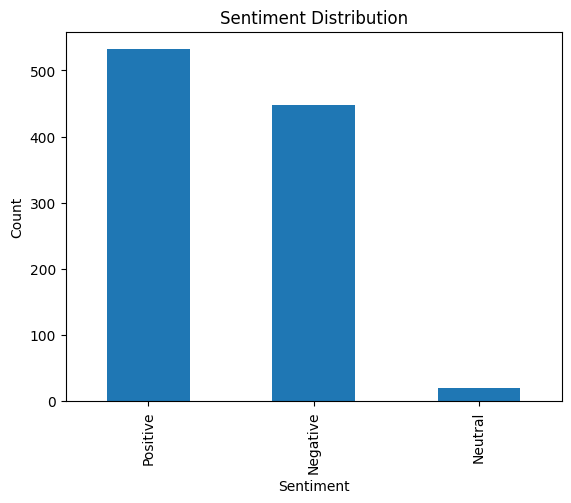

<Figure size 640x480 with 0 Axes>

In [180]:
# Sentiment distribution for 'Review Sentiment'
sentiment_counts = df['Review Sentiment'].value_counts()

# Plot the sentiment distribution
sentiment_counts.plot(kind='bar', title='Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
# Save the figure as an image file
plt.savefig("sentiment_distribution.png", bbox_inches='tight', dpi=300)

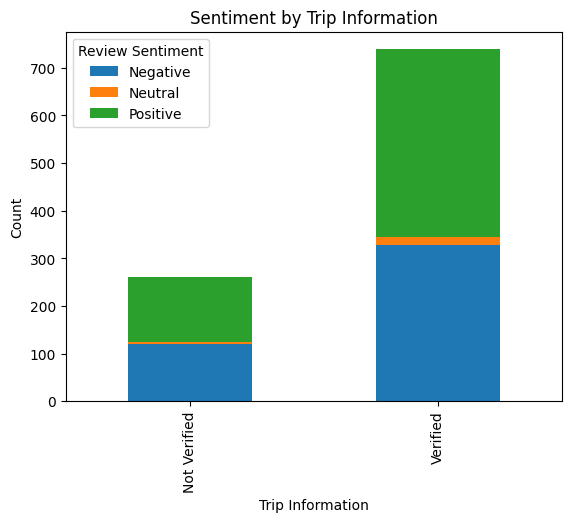

<Figure size 640x480 with 0 Axes>

In [181]:
# Sentiment comparison based on trip verification
verified_sentiment.plot(kind='bar', stacked=True, title='Sentiment by Trip Information')
plt.xlabel('Trip Information')
plt.ylabel('Count')
plt.show()

# Save the figure as an image file
plt.savefig("sentiment_by_trip_info.png", bbox_inches='tight', dpi=300)


In [182]:
!pip install python-pptx


In [186]:
from pptx import Presentation
from pptx.util import Inches

# Create a presentation
prs = Presentation()

# Slide 1: Title Slide
slide_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
subtitle = slide.placeholders[1]
title.text = "Customer Review Insights"
subtitle.text = "Key insights from the review data analysis"

# Slide 2: Sentiment Distribution Chart
slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
title.text = "Sentiment Distribution"
slide.shapes.add_picture('/content/sentiment_distribution.png', Inches(1), Inches(1.5), width=Inches(8))

# Slide 3: Verified vs Not Verified Sentiment Comparison
slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(slide_layout)
title = slide.shapes.title
title.text = "Sentiment by Trip Information"
slide.shapes.add_picture('/content/sentiment_by_trip_info.png', Inches(1), Inches(1.5), width=Inches(8))

# Save PowerPoint
prs.save('Review_Analysis.pptx')


In [188]:
from pptx import Presentation
from pptx.util import Inches

# Initialize presentation object
prs = Presentation()

# Slide 1: Title Slide
slide_1 = prs.slides.add_slide(prs.slide_layouts[0])  # Title Slide layout
title = slide_1.shapes.title
subtitle = slide_1.placeholders[1]

title.text = "Airline Review Insights"
subtitle.text = "Insights based on verified and not verified traveler reviews."

# Slide 2: Key Highlights
slide_2 = prs.slides.add_slide(prs.slide_layouts[1])  # Title and Content layout
title = slide_2.shapes.title
title.text = "Key Highlights"

content = slide_2.shapes.placeholders[1].text_frame
content.text = "1. Review Verification:\n   - Verified Reviews: 739 (74%)\n   - Not Verified Reviews: 261 (26%)\n   - Majority of reviews are from verified travelers.\n\n" \
               "2. Sentiment Analysis:\n   - Positive Sentiments: 532 (53%)\n   - Negative Sentiments: 448 (44%)\n   - Neutral Sentiments: 20 (2%)\n   - Positive feedback prevails, but negative reviews indicate areas for improvement.\n\n" \
               "3. Sentiment by Verification:\n   - Verified Reviews: 395 Positive, 327 Negative, 17 Neutral\n   - Not Verified Reviews: 137 Positive, 121 Negative, 3 Neutral\n"

# Slide 3: Visuals (Bar Chart or Stacked Bar Chart)
# Note: You need to create the chart separately (e.g., using matplotlib or seaborn) and save as an image.
# You can add the image with the following code, assuming the image is saved as "sentiment_distribution.png"
slide_3 = prs.slides.add_slide(prs.slide_layouts[5])  # Title and Content layout
title = slide_3.shapes.title
title.text = "Sentiment Distribution"
slide_3.shapes.add_picture("sentiment_distribution.png", Inches(1), Inches(1), width=Inches(8))

# Slide 4: Word Cloud Insights
# Similarly, generate and save the word cloud image first, then add it here.
slide_4 = prs.slides.add_slide(prs.slide_layouts[5])  # Title and Content layout
title = slide_4.shapes.title
title.text = "Word Cloud Insights"
slide_4.shapes.add_picture("/content/most frequent word.png", Inches(1), Inches(1), width=Inches(8))

# Slide 5: Key Takeaways
slide_5 = prs.slides.add_slide(prs.slide_layouts[1])  # Title and Content layout
title = slide_5.shapes.title
title.text = "Key Takeaways"

content = slide_5.shapes.placeholders[1].text_frame
content.text = "1. Strengths:\n   - Positive feedback from a majority of verified travelers.\n\n" \
               "2. Improvement Areas:\n   - Address common complaints about 'delay,' 'refund,' and 'luggage.'\n\n" \
               "3. Actionable Insights:\n   - Focus on enhancing customer service and operational efficiency."

# Slide 6: Next Steps
slide_6 = prs.slides.add_slide(prs.slide_layouts[1])  # Title and Content layout
title = slide_6.shapes.title
title.text = "Next Steps"

content = slide_6.shapes.placeholders[1].text_frame
content.text = "1. Implement targeted strategies to address key areas of dissatisfaction.\n" \
               "2. Monitor future reviews to measure the impact of implemented changes."

# Save presentation
prs.save("Airline_Review_Insights.pptx")
